In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Adam Adnan
- **Email:** adnan100701@gmail.com
- **ID Dicoding:** insight_dt

## Menentukan Pertanyaan Bisnis

- Pada jam berapa peminjaman sepeda mencapai rata-rata tertinggi selama periode 2011–2012?
- Selama periode 2011–2012, segmen pengguna mana (casual atau registered) yang memberikan kontribusi terbesar terhadap total peminjaman sepeda?
- Bagaimana perbedaan rata-rata jumlah peminjaman sepeda berdasarkan kondisi cuaca dan musim selama periode 2011–2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/Data Science/Project Data Analiyst/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/drive/MyDrive/Data Science/Project Data Analiyst/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel day berisi data peminjaman yang sudah dijumlahkan per hari (1 baris = 1 tanggal), sehingga cocok untuk melihat pola umum seperti perubahan jumlah peminjaman berdasarkan bulan/musim, hari kerja atau libur, dan kondisi cuaca.

- Sementara itu, tabel hour berisi data peminjaman per jam (1 tanggal memiliki banyak baris sesuai jam), sehingga cocok untuk melihat jam-jam tertentu yang ramai atau sepi, serta membandingkan pola penggunaan pada hari kerja dan akhir pekan.

### Assessing Data

#### Dataset Day

In [ ]:
# Cek Tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Cek Validasi logikas cnt = casual + registered
(day_df["cnt"] == day_df["casual"] + day_df["registered"]).value_counts()

,count
True,731


In [ ]:
# Cek Range nilai variabel waktu
print("Month range:", day_df["mnth"].min(), "-", day_df["mnth"].max())
print("Weekday range:", day_df["weekday"].min(), "-", day_df["weekday"].max())
print("Season range:", day_df["season"].min(), "-", day_df["season"].max())


Month range: 1 - 12
Weekday range: 0 - 6
Season range: 1 - 4


#### Dataset Hour

In [ ]:
# Cek Tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Cek Missing value
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Cek Duplikasi
hour_df.duplicated().sum()

np.int64(0)

In [ ]:
# Statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Cek Validasi Logika cnt
(hour_df["cnt"] == hour_df["casual"] + hour_df["registered"]).value_counts()

,count
True,17379


In [ ]:
# Cek Validasi nilai Jam
print("Hour range:", hour_df["hr"].min(), "-", hour_df["hr"].max())

Hour range: 0 - 23


**Insight:**

Hasil pemeriksaan kualitas data menunjukkan bahwa baik dataset day maupun hour tidak memiliki nilai yang hilang (missing values) maupun data duplikat, sehingga data dapat langsung digunakan tanpa proses imputasi atau penghapusan duplikasi.

Namun, ditemukan bahwa beberapa variabel yang bersifat kategorikal seperti season, weathersit, mnth, dan weekday masih direpresentasikan dalam bentuk numerik, yang dapat menyulitkan interpretasi pada tahap visualisasi dan analisis bisnis. Selain itu, kolom dteday masih bertipe object sehingga perlu dikonversi menjadi tipe datetime agar mendukung analisis berbasis waktu.

### Cleaning Data

In [ ]:
# Konversi tipe data dteday
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

print(day_df["dteday"].dtypes)
print(hour_df["dteday"].dtypes)

datetime64[ns]
datetime64[ns]


In [ ]:
# Mapping season dan weathersit
season_map = {
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

weather_map = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
}

for df in [day_df, hour_df]:
    df["season"] = df["season"].map(season_map)
    df["weathersit"] = df["weathersit"].map(weather_map)

In [ ]:
# Day
print("Season", day_df['season'].unique())
print("Weathersit", day_df['season'].unique())

Season ['Springer' 'Summer' 'Fall' 'Winter']
Weathersit ['Springer' 'Summer' 'Fall' 'Winter']


In [ ]:
# Hour
print("Season", hour_df['season'].unique())
print("Weathersit", hour_df['weathersit'].unique())

Season ['Springer' 'Summer' 'Fall' 'Winter']
Weathersit ['Clear' 'Mist' 'Light Snow' 'Heavy Rain']


In [ ]:
# Membuat label hari dan bulan agar visualisasi lebih jelas
for df in [day_df, hour_df]:
    df["weekday"] = df["weekday"].apply(lambda x: calendar.day_name[x])
    df["mnth"] = df["mnth"].apply(lambda x: calendar.month_name[x])

In [ ]:
# Day
print("Weekday", day_df["weekday"].unique())
print("Month", day_df["mnth"].unique())

Weekday ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [ ]:
# Hour
print("Weekday", hour_df["weekday"].unique())
print("Month", hour_df["mnth"].unique())

Weekday ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [ ]:
# Drop kolom yang tidak relevan
day_df.drop(columns=["instant"], inplace=True)
hour_df.drop(columns=["instant"], inplace=True)

In [ ]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,0,January,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,0,January,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,0,January,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,0,January,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,0,January,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.to_csv("day.csv", index=False)

In [ ]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,0,January,0,0,Sunday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Springer,0,January,1,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Springer,0,January,2,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Springer,0,January,3,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Springer,0,January,4,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.to_csv("hour.csv", index=False)

**Insight:**

Proses cleaning data dilakukan dengan fokus pada peningkatan interpretabilitas data. Kolom dteday dikonversi menjadi tipe datetime untuk mendukung analisis berbasis waktu. Selain itu, beberapa variabel kategorikal seperti season, weathersit, weekday, dan mnth yang sebelumnya direpresentasikan dalam bentuk numerik diubah menjadi label kategori agar lebih mudah dipahami dalam visualisasi dan analisis bisnis.

Tidak dilakukan penghapusan data karena dataset sudah bersih dari missing values dan duplikasi. Dengan demikian, hasil cleaning lebih bersifat transformasi format daripada perbaikan kualitas data.

## Exploratory Data Analysis (EDA)

### Explore - Statistik deskriptif variabel utama

In [ ]:
day_df[["cnt", "casual", "registered"]].describe(

,cnt,casual,registered
count,731.000000,731.000000,731.000000
mean,4504.348837,848.176471,3656.172367
std,1937.211452,686.622488,1560.256377
min,22.000000,2.000000,20.000000
25%,3152.000000,315.500000,2497.000000
50%,4548.000000,713.000000,3662.000000
75%,5956.000000,1096.000000,4776.500000
max,8714.000000,3410.000000,6946.000000


In [ ]:
hour_df[["cnt", "casual", "registered"]].describe()

,cnt,casual,registered
count,17379.000000,17379.000000,17379.000000
mean,189.463088,35.676218,153.786869
std,181.387599,49.305030,151.357286
min,1.000000,0.000000,0.000000
25%,40.000000,4.000000,34.000000
50%,142.000000,17.000000,115.000000
75%,281.000000,48.000000,220.000000
max,977.000000,367.000000,886.000000


**Insight:**

Berdasarkan statistik deskriptif variabel utama pada periode 2011–2012, data harian (day_df) menunjukkan rata-rata total peminjaman sepeda (cnt) sekitar 4.504 peminjaman per hari, dengan kontribusi yang didominasi oleh pengguna terdaftar (registered) dengan rata-rata 3.569 peminjaman per hari, sedangkan pengguna kasual (casual) hanya sekitar 848 peminjaman per hari, yang mengindikasikan bahwa layanan bike sharing lebih banyak dimanfaatkan oleh pengguna rutin dibandingkan pengguna sesekali. Nilai standar deviasi peminjaman harian yang cukup tinggi mencerminkan adanya variasi permintaan yang signifikan antar hari, sehingga tingkat peminjaman tidak bersifat konstan dan sangat mungkin dipengaruhi oleh kondisi tertentu. Pada data per jam (hour_df), rata-rata peminjaman tercatat sekitar 189 peminjaman per jam, dengan pola dominasi pengguna registered yang konsisten (±154 peminjaman per jam) dibandingkan casual (±36 peminjaman per jam), yang memperkuat indikasi bahwa sepeda digunakan terutama untuk kebutuhan mobilitas yang bersifat rutin. Selain itu, perbedaan antara nilai minimum, median, dan maksimum peminjaman per jam serta besarnya standar deviasi menunjukkan bahwa permintaan sepeda bervariasi tajam pada waktu-waktu tertentu, mencerminkan karakteristik penggunaan yang sangat bergantung pada waktu dalam satu hari.

### Explore - Distribusi jumlah peminjaman (cnt)

#### Daily

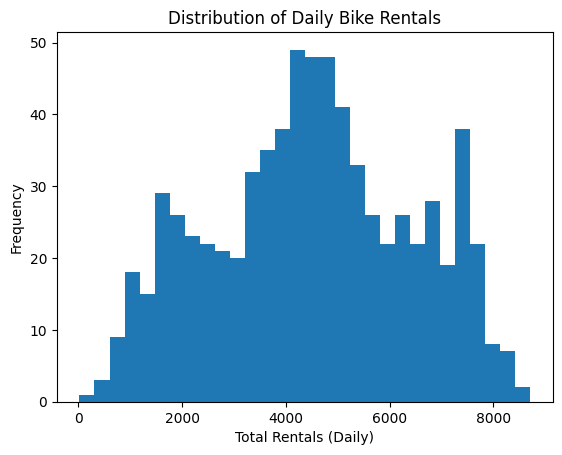

In [ ]:
plt.figure()
plt.hist(day_df["cnt"], bins=30)
plt.xlabel("Total Rentals (Daily)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Bike Rentals")
plt.show()


#### Hourly

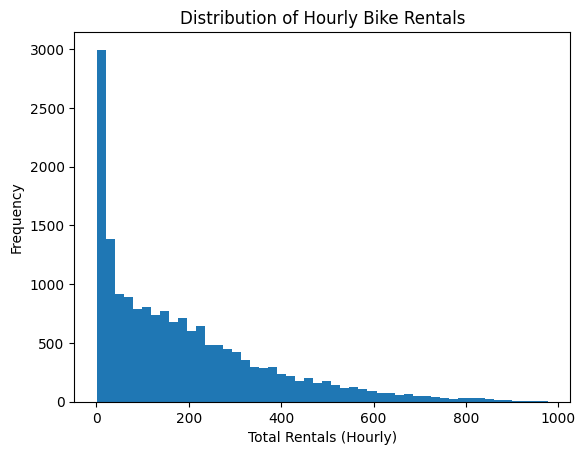

In [ ]:
plt.figure()
plt.hist(hour_df["cnt"], bins=50)
plt.xlabel("Total Rentals (Hourly)")
plt.ylabel("Frequency")
plt.title("Distribution of Hourly Bike Rentals")
plt.show()


**Insight:**

Distribusi jumlah peminjaman sepeda (cnt) menunjukkan pola yang berbeda antara data per jam dan per hari. Pada distribusi hourly, histogram tampak miring ke kanan (right-skewed): sebagian besar jam berada pada tingkat peminjaman rendah hingga menengah, lalu frekuensinya menurun seiring kenaikan jumlah peminjaman, dengan ekor panjang hingga mendekati ±1.000 peminjaman/jam. Pola ini mengindikasikan bahwa lonjakan permintaan hanya terjadi pada jam-jam tertentu, sementara mayoritas jam lainnya relatif lebih sepi. Sebaliknya, distribusi daily terlihat lebih tersebar dan cenderung terkonsentrasi di rentang menengah, dengan puncak frekuensi terutama pada kisaran ±4.000–6.000 peminjaman/hari, namun masih ada sejumlah hari dengan peminjaman tinggi hingga ±8.000–9.000 serta hari-hari dengan peminjaman rendah yang jumlahnya lebih sedikit. Secara umum, hal ini menegaskan bahwa variasi peminjaman lebih ekstrem pada skala per jam (karena adanya jam puncak), sementara pada skala per hari fluktuasi tetap ada tetapi cenderung lebih “stabil” karena efek agregasi dalam satu hari.

### Explore – Tren peminjaman secara umum terhadap waktu

#### Tren harian (day)

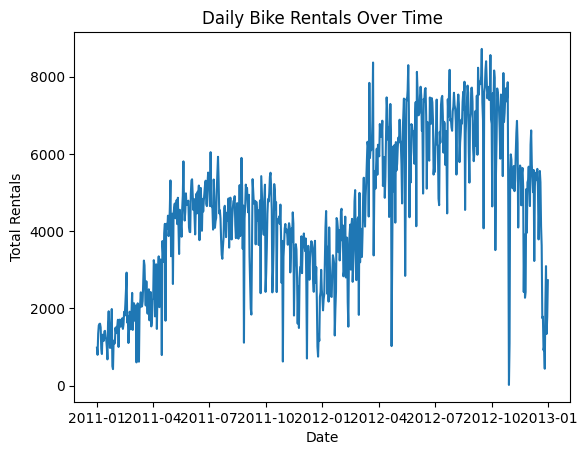

In [ ]:
plt.figure()
plt.plot(day_df["dteday"], day_df["cnt"])
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily Bike Rentals Over Time")
plt.show()

**Insight:**

Tren peminjaman sepeda secara umum terhadap waktu menunjukkan pola musiman dan siklis yang jelas selama periode 2011–2012. Pada awal 2011, jumlah peminjaman relatif rendah, kemudian mengalami peningkatan bertahap hingga mencapai level yang lebih tinggi pada pertengahan tahun, sebelum kembali menurun menjelang akhir tahun. Pola serupa kembali terulang pada tahun 2012, namun dengan tingkat peminjaman yang secara umum lebih tinggi dibandingkan tahun sebelumnya, yang mengindikasikan adanya pertumbuhan penggunaan layanan bike sharing dari waktu ke waktu. Fluktuasi harian yang cukup tajam juga terlihat sepanjang periode pengamatan, mencerminkan bahwa meskipun terdapat tren peningkatan secara keseluruhan, peminjaman sepeda tetap sangat dipengaruhi oleh faktor jangka pendek seperti kondisi cuaca, hari kerja atau akhir pekan, serta aktivitas musiman lainnya.

### Explore – Perbandingan casual vs registered

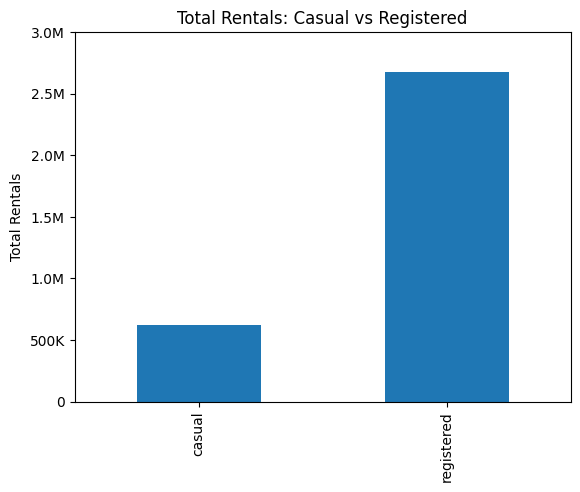

In [76]:
import numpy as np
from matplotlib.ticker import FuncFormatter

def format_km(x, pos):
    if x == 0:
        return "0"
    elif x >= 1_000_000:
        return f"{x/1_000_000:.1f}M"
    else:
        return f"{x/1_000:.0f}K"

total_users = day_df[["casual", "registered"]].sum()

plt.figure()
ax = total_users.plot(kind="bar")

plt.ylim(0, 3000000)
plt.yticks(np.arange(0, 3000001, 500000))

ax.yaxis.set_major_formatter(FuncFormatter(format_km))

plt.ylabel("Total Rentals")
plt.title("Total Rentals: Casual vs Registered")
plt.show()


**Insight:**

Perbandingan total peminjaman sepeda antara pengguna casual dan registered menunjukkan perbedaan yang sangat signifikan. Selama periode 2011–2012, total peminjaman oleh pengguna registered jauh lebih besar dibandingkan pengguna casual, dengan jumlah yang mencapai beberapa kali lipat lebih tinggi. Hal ini menegaskan bahwa kontribusi utama terhadap total peminjaman sepeda berasal dari pengguna terdaftar yang cenderung menggunakan layanan secara rutin dan berulang, sedangkan pengguna casual berperan lebih kecil dan kemungkinan besar memanfaatkan sepeda untuk kebutuhan yang bersifat sesekali atau rekreasional. Dominasi pengguna registered ini mengindikasikan bahwa keberlangsungan dan stabilitas permintaan layanan bike sharing sangat bergantung pada segmen pengguna terdaftar.

### Explore – Korelasi awal antar variabel numerik

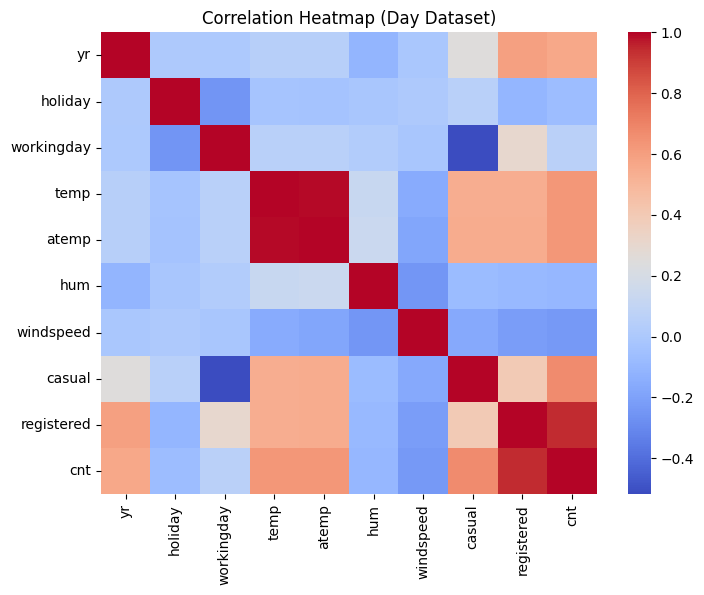

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(day_df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Day Dataset)")
plt.show()


**Insight:**

Korelasi awal pada dataset harian menunjukkan bahwa jumlah peminjaman total (cnt) memiliki hubungan yang paling kuat dengan registered dan casual, yang wajar karena cnt merupakan akumulasi dari kedua segmen tersebut. Dari variabel numerik lingkungan, temperatur (temp) dan atemp terlihat memiliki korelasi positif cukup kuat terhadap cnt, mengindikasikan bahwa peminjaman cenderung meningkat saat kondisi suhu lebih hangat/nyaman. Sebaliknya, kelembapan (hum) menunjukkan korelasi negatif terhadap cnt, yang mengarah pada kecenderungan penurunan peminjaman ketika udara lebih lembap (biasanya berasosiasi dengan kondisi cuaca kurang nyaman). Variabel windspeed tampak memiliki korelasi yang lebih lemah dibandingkan suhu dan kelembapan, sehingga pengaruhnya terhadap peminjaman tidak sekuat faktor kenyamanan termal. Selain itu, variabel workingday berkorelasi lebih kuat dengan registered dibanding casual, yang mengindikasikan bahwa pengguna terdaftar lebih dominan pada hari kerja (pola penggunaan rutin/komuter), sedangkan pengguna casual relatif tidak terlalu terikat pada hari kerja. Secara keseluruhan, heatmap ini menegaskan bahwa permintaan bike sharing terutama dipengaruhi oleh tipe pengguna (registered) dan kondisi kenyamanan cuaca, terutama suhu dan kelembapan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa peminjaman sepeda mencapai rata-rata tertinggi selama periode 2011–2012?

#### Rata-rata peminjaman per jam

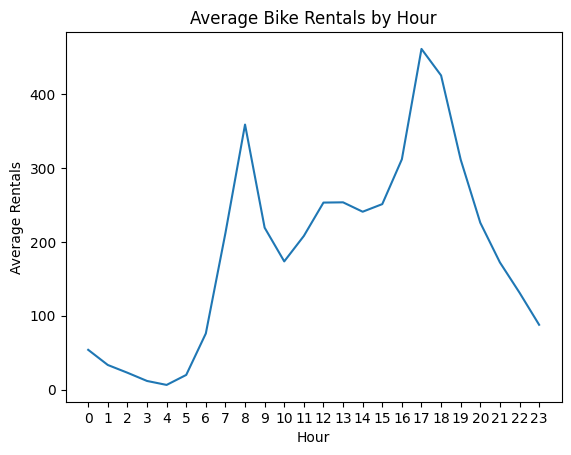

In [ ]:
import matplotlib.pyplot as plt

hourly_avg = hour_df.groupby("hr")["cnt"].mean()

plt.figure()
hourly_avg.plot()
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.title("Average Bike Rentals by Hour")
plt.xticks(range(0,24))
plt.show()


**Insight:**

Berdasarkan visualisasi rata-rata peminjaman sepeda per jam selama periode 2011–2012, peminjaman tertinggi terjadi pada sore hari, khususnya sekitar pukul 17.00–18.00, dengan puncak utama berada di sekitar pukul 17.00. Selain itu, terlihat pula puncak sekunder pada pagi hari sekitar pukul 08.00, meskipun nilainya lebih rendah dibandingkan puncak sore. Pola ini menunjukkan bahwa peminjaman sepeda sangat dipengaruhi oleh aktivitas komuter, di mana sepeda banyak digunakan pada jam berangkat dan pulang kerja atau aktivitas harian. Dengan demikian, dapat disimpulkan bahwa jam sore (sekitar 17.00) merupakan waktu dengan rata-rata peminjaman sepeda tertinggi selama periode pengamatan, mencerminkan peran bike sharing sebagai moda transportasi utama pada jam sibuk.

#### Perbandingan weekday vs weekend

<Figure size 640x480 with 0 Axes>

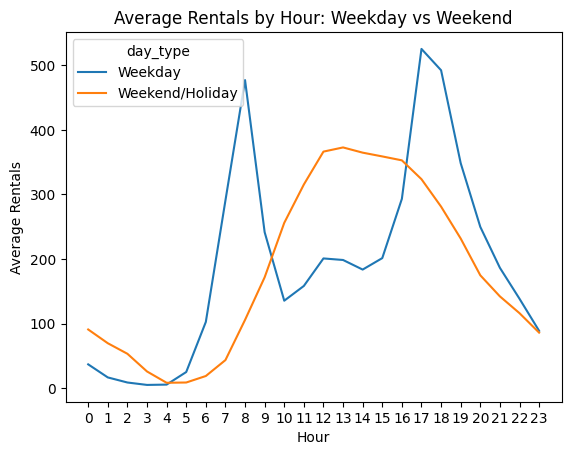

In [ ]:
hour_df["day_type"] = hour_df["workingday"].map({1: "Weekday", 0: "Weekend/Holiday"})

hourly_daytype = hour_df.groupby(["hr", "day_type"])["cnt"].mean().unstack()

plt.figure()
hourly_daytype.plot()
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.title("Average Rentals by Hour: Weekday vs Weekend")
plt.xticks(range(0,24))
plt.show()


**Insight:**

Perbandingan pola rata-rata peminjaman sepeda antara weekday dan weekend/holiday menunjukkan perbedaan karakteristik penggunaan yang sangat jelas. Pada weekday, peminjaman membentuk dua puncak tajam, yaitu pada pagi hari sekitar pukul 08.00 dan sore hari sekitar pukul 17.00–18.00, yang mencerminkan pola penggunaan sepeda untuk aktivitas komuter seperti berangkat dan pulang kerja atau kegiatan rutin lainnya. Sebaliknya, pada weekend dan hari libur, peminjaman sepeda tidak menunjukkan puncak pagi yang kuat, melainkan meningkat secara bertahap sejak pagi dan mencapai puncak pada siang hingga sore hari (sekitar pukul 12.00–15.00), kemudian menurun menjelang malam. Pola ini mengindikasikan bahwa pada akhir pekan sepeda lebih banyak digunakan untuk aktivitas rekreasi atau waktu luang, bukan untuk mobilitas rutin, sehingga waktu puncak peminjaman bergeser dari jam sibuk komuter ke jam-jam tengah hari.

#### Heatmap: kombinasi jam dan hari

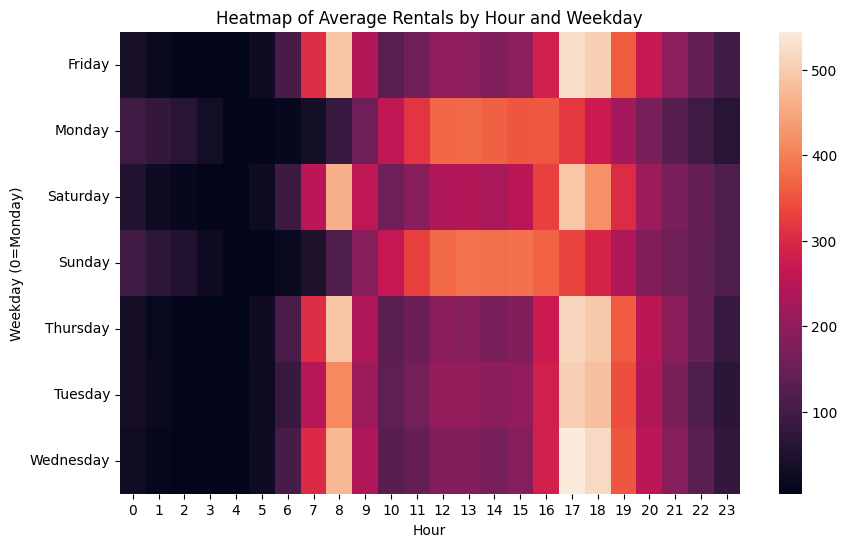

In [ ]:
import seaborn as sns

pivot = hour_df.pivot_table(values="cnt", index="weekday", columns="hr", aggfunc="mean")

plt.figure(figsize=(10,6))
sns.heatmap(pivot)
plt.xlabel("Hour")
plt.ylabel("Weekday (0=Monday)")
plt.title("Heatmap of Average Rentals by Hour and Weekday")
plt.show()


**Insight:**

Heatmap kombinasi jam dan hari memperlihatkan pola peminjaman sepeda yang konsisten dan terstruktur sepanjang minggu. Pada hari kerja (Senin–Jumat), intensitas peminjaman paling tinggi terkonsentrasi pada dua rentang waktu utama, yaitu pagi hari sekitar pukul 07.00–09.00 dan sore hari sekitar pukul 16.00–18.00, yang tampak jelas dari area berwarna paling terang pada heatmap. Pola ini menguatkan karakteristik penggunaan sepeda sebagai moda transportasi komuter pada hari kerja. Sebaliknya, pada akhir pekan (Sabtu–Minggu), intensitas peminjaman tidak lagi terfokus pada jam pagi, melainkan cenderung menyebar dan memuncak pada siang hingga sore hari, terutama sekitar pukul 11.00–16.00. Perbedaan pola ini menunjukkan bahwa waktu puncak peminjaman sangat dipengaruhi oleh jenis hari, di mana hari kerja didominasi oleh kebutuhan mobilitas rutin, sementara akhir pekan lebih mencerminkan penggunaan sepeda untuk aktivitas rekreasi dan waktu luang.

### Pertanyaan 2: Selama periode 2011–2012, segmen pengguna mana (casual atau registered) yang memberikan kontribusi terbesar terhadap total peminjaman sepeda?

#### Pola penggunaan berdasarkan waktu

<Figure size 640x480 with 0 Axes>

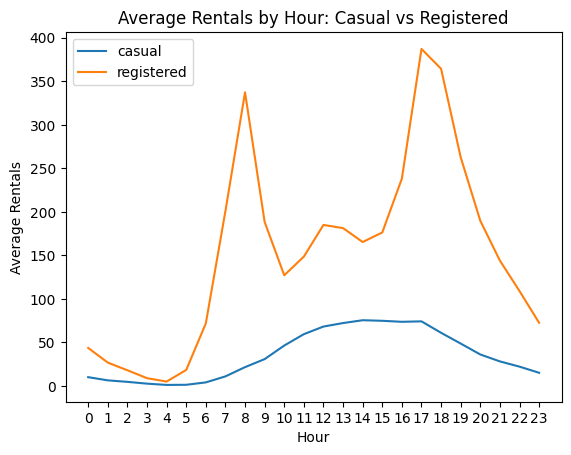

In [ ]:
hourly_user = hour_df.groupby("hr")[["casual", "registered"]].mean()

plt.figure()
hourly_user.plot()
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.title("Average Rentals by Hour: Casual vs Registered")
plt.xticks(range(0,24))
plt.show()

**Insight:**

Berdasarkan rata-rata peminjaman sepeda per jam, pengguna registered secara konsisten memberikan kontribusi yang jauh lebih besar dibandingkan pengguna casual pada hampir seluruh jam dalam satu hari. Pola pengguna registered menunjukkan dua puncak yang sangat jelas pada pagi hari sekitar pukul 08.00 dan sore hari sekitar pukul 17.00–18.00, yang mencerminkan penggunaan sepeda untuk aktivitas mobilitas rutin atau komuter. Sebaliknya, peminjaman oleh pengguna casual relatif lebih rendah dan cenderung meningkat secara bertahap sejak siang hari, dengan puncak yang lebih landai pada siang hingga sore hari, menunjukkan karakter penggunaan yang lebih bersifat rekreasional. Perbedaan pola dan besaran ini menegaskan bahwa selama periode 2011–2012, segmen pengguna registered merupakan kontributor utama terhadap total peminjaman sepeda, baik dari sisi intensitas maupun konsistensi penggunaan sepanjang waktu.fleksibel.

### Pertanyaan 3: Bagaimana perbedaan rata-rata jumlah peminjaman sepeda berdasarkan kondisi cuaca dan musim selama periode 2011–2012?

#### Pengaruh cuaca terhadap peminjaman

In [ ]:
weather_rentals = hour_df.groupby("weathersit")["cnt"].mean()
print(weather_rentals)

weathersit
Clear         204.869272
Heavy Rain     74.333333
Light Snow    111.579281
Mist          175.165493
Name: cnt, dtype: float64


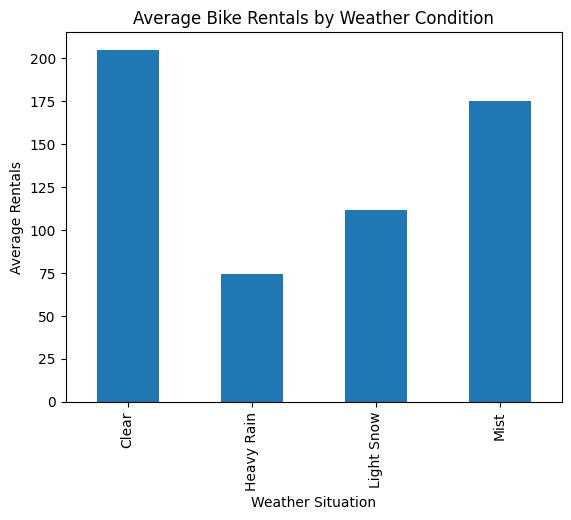

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
weather_rentals.plot(kind="bar")
plt.xlabel("Weather Situation")
plt.ylabel("Average Rentals")
plt.title("Average Bike Rentals by Weather Condition")
plt.show()


**Insight:**

Berdasarkan visualisasi rata-rata peminjaman sepeda menurut kondisi cuaca (weathersit) selama 2011–2012, terlihat bahwa cuaca berperan kuat terhadap tingkat permintaan. Kondisi Clear menghasilkan rata-rata peminjaman tertinggi, yaitu sekitar 204,87 peminjaman, menunjukkan bahwa pengguna paling aktif ketika cuaca cerah dan nyaman. Kondisi Mist berada pada urutan kedua dengan rata-rata sekitar 175,17, yang mengindikasikan bahwa kabut/berawan ringan masih cukup mendukung aktivitas bersepeda meskipun tidak setinggi saat cerah. Sebaliknya, rata-rata peminjaman menurun cukup tajam pada kondisi cuaca yang lebih buruk: Light Snow hanya sekitar 111,58, dan yang paling rendah adalah Heavy Rain dengan rata-rata sekitar 74,33. Pola ini menegaskan bahwa semakin tidak nyaman kondisi cuaca (terutama hujan lebat), semakin besar penurunan minat pengguna untuk meminjam sepeda, sehingga cuaca merupakan faktor penting dalam fluktuasi peminjaman harian/jam.

#### Pengaruh musim

In [ ]:
season_rentals = day_df.groupby("season")["cnt"].mean()
print(season_rentals)

season
Fall        5644.303191
Springer    2604.132597
Summer      4992.331522
Winter      4728.162921
Name: cnt, dtype: float64


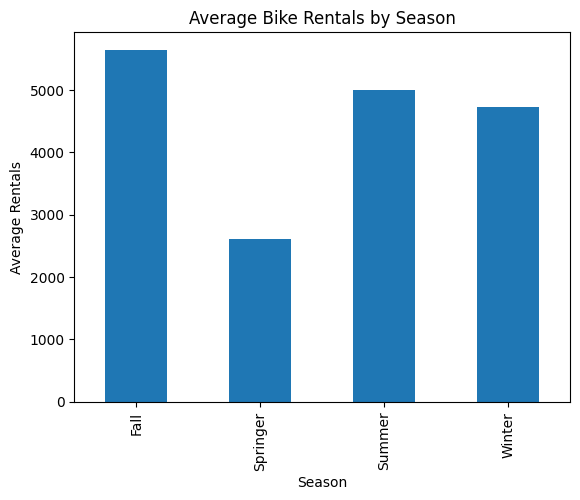

In [ ]:
plt.figure()
season_rentals.plot(kind="bar")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.title("Average Bike Rentals by Season")
plt.show()


**Insight:**

Berdasarkan visualisasi rata-rata peminjaman sepeda menurut musim (season) selama periode 2011–2012, terlihat adanya perbedaan yang cukup jelas antar musim. Musim gugur (Fall) mencatat rata-rata peminjaman tertinggi, yaitu sekitar 5.644 peminjaman, diikuti oleh musim panas (Summer) dengan rata-rata sekitar 4.992 peminjaman. Musim dingin (Winter) berada sedikit di bawahnya dengan rata-rata sekitar 4.728 peminjaman, sementara musim semi (Spring) menunjukkan rata-rata peminjaman yang paling rendah, yaitu sekitar 2.604 peminjaman. Pola ini menunjukkan bahwa peminjaman sepeda cenderung lebih tinggi pada musim dengan kondisi cuaca yang relatif lebih stabil dan nyaman, sedangkan pada musim dengan kondisi yang kurang mendukung, tingkat peminjaman menurun secara signifikan.

## Analisis Lanjutan: Clustering

In [ ]:
# Membentuk dataset agregasi per jam
hour_cluster = hour_df.groupby("hr")["cnt"].mean().reset_index()
hour_cluster.head()

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


In [ ]:
# Clustering berbasis quantile
hour_cluster["demand_level"] = pd.qcut(
    hour_cluster["cnt"],
    q=3,
    labels=["Low Demand", "Medium Demand", "High Demand"]
)

hour_cluster

,hr,cnt,demand_level
0,0,53.898072,Low Demand
1,1,33.375691,Low Demand
2,2,22.869930,Low Demand
3,3,11.727403,Low Demand
4,4,6.352941,Low Demand
5,5,19.889819,Low Demand
6,6,76.044138,Low Demand
7,7,212.064649,Medium Demand
8,8,359.011004,High Demand
9,9,219.309491,Medium Demand


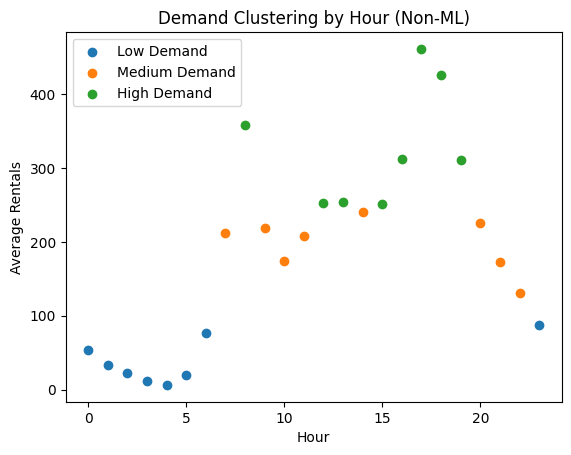

In [ ]:
# Visualisasi hasil clustering
plt.figure()
for label in ["Low Demand", "Medium Demand", "High Demand"]:
    subset = hour_cluster[hour_cluster["demand_level"] == label]
    plt.scatter(subset["hr"], subset["cnt"], label=label)

plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.title("Demand Clustering by Hour (Non-ML)")
plt.legend()
plt.show()

In [ ]:
hour_cluster.sort_values("cnt")


,hr,cnt,demand_level
4,4,6.352941,Low Demand
3,3,11.727403,Low Demand
5,5,19.889819,Low Demand
2,2,22.869930,Low Demand
1,1,33.375691,Low Demand
0,0,53.898072,Low Demand
6,6,76.044138,Low Demand
23,23,87.831044,Low Demand
22,22,131.335165,Medium Demand
21,21,172.314560,Medium Demand


**Insight:**

Analisis lanjutan menggunakan clustering berdasarkan rata-rata peminjaman per jam menunjukkan bahwa pola permintaan dapat dikelompokkan menjadi tiga tingkat, yaitu Low Demand, Medium Demand, dan High Demand. Kelompok Low Demand didominasi oleh jam-jam sepi pada dini hari hingga subuh (sekitar 00.00–05.00) dan kembali muncul pada larut malam (sekitar 22.00–23.00), ketika rata-rata peminjaman sangat rendah. Kelompok Medium Demand umumnya terjadi pada jam transisi dan jam aktivitas yang relatif stabil, seperti pagi menuju siang hingga sore awal (sekitar 09.00–16.00) serta malam awal (sekitar 19.00–21.00), di mana permintaan tetap ada namun tidak setinggi jam puncak. Sementara itu, High Demand terkonsentrasi pada jam-jam puncak, terutama sore hari sekitar 17.00–18.00 sebagai puncak tertinggi, serta pagi hari sekitar 08.00 sebagai puncak sekunder, yang menandakan periode dengan kebutuhan peminjaman paling tinggi dan krusial untuk memastikan ketersediaan sepeda; dengan pengelompokan ini, operasional dapat dioptimalkan dengan memprioritaskan distribusi pada jam permintaan tinggi dan menjadwalkan penataan atau perawatan armada pada jam permintaan rendah.

## Conclusion

1.   Selama periode 2011–2012, rata-rata peminjaman sepeda mencapai nilai tertinggi pada pukul 17.00–18.00, dengan puncak utama berada di sekitar pukul 17.00. Pola ini paling menonjol pada hari kerja, di mana terlihat dua lonjakan khas jam komuter (pagi sekitar pukul 08.00 dan sore sekitar pukul 17.00–18.00), sementara pada akhir pekan puncak peminjaman bergeser ke siang–sore. Temuan ini menunjukkan bahwa permintaan tertinggi terutama dipicu oleh mobilitas rutin, khususnya pada jam pulang beraktivitas.
2.   pengguna registered merupakan segmen yang memberikan kontribusi terbesar terhadap total peminjaman sepeda. Hal ini terlihat dari jumlah peminjaman yang secara konsisten lebih tinggi pada hampir seluruh jam, terutama pada pagi dan sore hari saat aktivitas harian berlangsung. Sebaliknya, pengguna casual menunjukkan tingkat peminjaman yang lebih rendah dan cenderung meningkat pada siang hingga sore hari. Temuan ini menunjukkan bahwa permintaan layanan bike sharing terutama didorong oleh pengguna terdaftar yang memanfaatkan sepeda secara rutin dalam aktivitas sehari-hari
3.   rata-rata peminjaman sepeda menunjukkan perbedaan yang jelas berdasarkan kondisi cuaca dan musim. Dari sisi cuaca, peminjaman tertinggi terjadi saat Clear dengan rata-rata sekitar 204,87, diikuti Mist sekitar 175,17, sementara peminjaman menurun pada kondisi yang kurang mendukung seperti Light Snow sekitar 111,58 dan mencapai titik terendah pada Heavy Rain sekitar 74,33. Dari sisi musim, rata-rata peminjaman tertinggi terjadi pada Fall sekitar 5.644, disusul Summer sekitar 4.992 dan Winter sekitar 4.728, sedangkan Spring menjadi musim dengan rata-rata peminjaman terendah sekitar 2.604. Temuan ini menegaskan bahwa peminjaman sepeda cenderung meningkat pada kondisi cuaca yang lebih nyaman dan menurun secara signifikan ketika cuaca memburuk, serta menunjukkan variasi musiman yang memengaruhi tingkat permintaan secara keseluruhan.





Secara keseluruhan, hasil analisis data peminjaman sepeda selama periode 2011–2012 menunjukkan bahwa pola penggunaan sangat dipengaruhi oleh waktu, jenis pengguna, serta kondisi lingkungan. Peminjaman tertinggi terjadi pada sore hari sekitar pukul 17.00–18.00, yang mencerminkan tingginya aktivitas harian pada jam tersebut. Dari sisi segmen pengguna, pengguna registered merupakan kontributor utama terhadap total peminjaman dan mendominasi hampir di seluruh rentang waktu. Selain itu, kondisi cuaca cerah dan musim dengan kondisi yang lebih nyaman, khususnya Fall dan Summer, mendorong peningkatan peminjaman sepeda secara signifikan. Analisis lanjutan melalui pengelompokan jam peminjaman memperkuat temuan ini dengan mengidentifikasi periode permintaan rendah, sedang, dan tinggi, yang memberikan gambaran lebih komprehensif mengenai dinamika penggunaan sepeda dalam satu hari. Secara umum, hasil ini menegaskan bahwa permintaan layanan bike sharing bersifat dinamis dan dipengaruhi oleh kombinasi faktor temporal, perilaku pengguna, dan kondisi lingkungan.